In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import statistics  as sts
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier
import tensorflow as tf

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Titanic-Dataset.csv to Titanic-Dataset (1).csv


In [ ]:
df = pd.read_csv('Titanic-Dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Resumo geral da base de dados

In [ ]:
print ("Linhas: " , df.shape[0])
print ("Colunas: " , df.shape[1])
print ("\nAtributos : \n" , df.columns.tolist())
print ("\nValores faltantes :  ", df.isnull().sum().values.sum())
print ("\nValores únicos :  \n",df.nunique())

Linhas:  891
Colunas:  12

Atributos : 
 ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

Valores faltantes :   866

Valores únicos :  
 PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64


## Pré-processamento

### Remoção ID, nome e ticket e verificação de dados faltantes

In [ ]:
df = df.drop(['PassengerId','Name', 'Ticket'],axis=1)
df2 = df.drop(['Cabin'],axis=1)

In [ ]:
# Verifica a quantidade de dados faltrantes
# df[df.isnull().any(axis=1)]
df.isna().sum()


Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

### Encoding Categorical Features

* LabelEncoder (apenas dois valores)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])
df2['Sex'] = le.fit_transform(df2['Sex'])
df2['Embarked'] = le.fit_transform(df2['Embarked'])

* Atributos com mais de dois valores

In [ ]:
df = pd.get_dummies(data=df, columns=['Cabin'])
df = pd.get_dummies(data=df, columns=['Age'])
df2 = pd.get_dummies(data=df2, columns=['Age'])

In [ ]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Cabin_A10', 'Cabin_A14', 'Cabin_A16',
       ...
       'Age_62.0', 'Age_63.0', 'Age_64.0', 'Age_65.0', 'Age_66.0', 'Age_70.0',
       'Age_70.5', 'Age_71.0', 'Age_74.0', 'Age_80.0'],
      dtype='object', length=242)

In [ ]:
df

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Cabin_A10,Cabin_A14,Cabin_A16,...,Age_62.0,Age_63.0,Age_64.0,Age_65.0,Age_66.0,Age_70.0,Age_70.5,Age_71.0,Age_74.0,Age_80.0
0,0,3,1,1,0,7.2500,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,1,0,71.2833,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,3,0,0,0,7.9250,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,0,53.1000,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,3,1,0,0,8.0500,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,0,0,13.0000,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
887,1,1,0,0,0,30.0000,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
888,0,3,0,1,2,23.4500,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
889,1,1,1,0,0,30.0000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Normalização dos dados

In [ ]:
std=StandardScaler()
columns = ['Fare']
scaled = std.fit_transform(df[['Fare']])
scaled = pd.DataFrame(scaled,columns=columns)
df=df.drop(columns=columns,axis=1)

In [ ]:
df=df.merge(scaled, left_index=True, right_index=True, how = "right")
df

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Cabin_A10,Cabin_A14,Cabin_A16,Cabin_A19,...,Age_63.0,Age_64.0,Age_65.0,Age_66.0,Age_70.0,Age_70.5,Age_71.0,Age_74.0,Age_80.0,Fare
0,0,3,1,1,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.502445
1,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.786845
2,1,3,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.488854
3,1,1,0,1,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.420730
4,0,3,1,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.486337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.386671
887,1,1,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.044381
888,0,3,0,1,2,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.176263
889,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.044381


## Algoritmos de Classificação

### Separação entre treino e teste (70% e 30%)

In [ ]:
X = df.drop(['Survived'],axis=1).values
y = df['Survived'].values

previsores = df.drop(['Survived'],axis=1)
alvo = df['Survived']

previsores = StandardScaler().fit_transform(previsores)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X2_train, X2_test, y2_train, y2_test = train_test_split(previsores, alvo, test_size=0.3)

### **Aplica balanceamento entre as classes**

In [ ]:
sm = SMOTE()
x_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)
x2_train_oversampled, y2_train_oversampled = sm.fit_resample(X2_train, y2_train)

In [ ]:
print(x_train_oversampled.shape)
print(X_train.shape)

(772, 241)
(623, 241)


# KNN

In [ ]:
k = 5
knn = KNeighborsClassifier(n_neighbors=k,metric = 'euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.7686567164179104

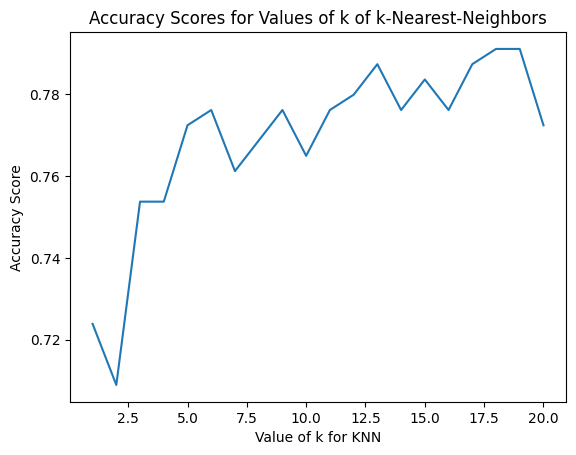

In [ ]:
# Teste para diferentes valores de k
k_range = list(range(1, 21))
scores = []
for k in k_range:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8)
    knn = KNeighborsClassifier(n_neighbors=k,metric = 'euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

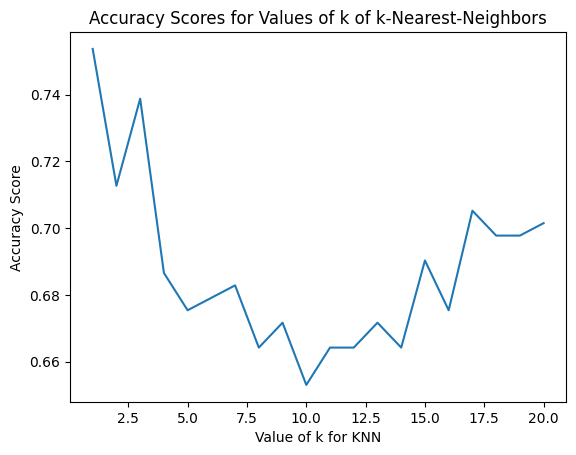

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# experimenting with different n values
k_range = list(range(1, 21))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

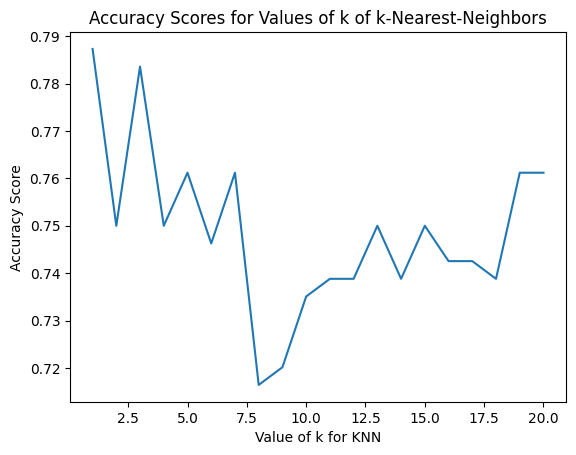

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# experimenting with different n values
k_range = list(range(1, 21))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

# GridSearchCV

In [87]:
sm = SMOTE()
x_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)

k_range = list(range(1, 21))
knn_param_grid = dict(n_neighbors=k_range)

grid_search_knn = GridSearchCV(estimator=knn, param_grid=knn_param_grid, cv=10)
grid_search_knn.fit(x_train_oversampled, y_train_oversampled);
print(grid_search_knn.best_params_)

{'n_neighbors': 1}


In [105]:
# criacao de novo df com os dados carregados
g_results_knn =  pd.DataFrame(grid_search_knn.cv_results_)
# media das acuracias
g_results_knn.loc[grid_search_knn.best_index_,'mean_test_score']

0.8019822282980178

In [94]:
m = grid_search_knn.best_estimator_
m.score(X_test,y_test)

0.7910447761194029

# RandomizedSearchCV

In [95]:
r_search_knn = RandomizedSearchCV(estimator = knn, param_distributions = knn_param_grid,
                        n_iter= 10, cv = 10, return_train_score=True, refit = True)

# balanceamento
sm = SMOTE()
x_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)
r_search_knn.fit(x_train_oversampled, y_train_oversampled);
print(r_search_knn.best_params_)
print(r_search_knn.best_score_)

{'n_neighbors': 9}
0.7770164046479835


In [123]:
model_r_rna = r_search_knn.best_estimator_
model_r_rna.score(X_test, y_test)

0.7611940298507462

<h1 style="font-family:Georgia;font-size:175%;text-align:left">Random Forest Classifier</h1>

In [ ]:
forest = RandomForestClassifier(random_state=42)
#==
forest.fit(x_train_oversampled, y_train_oversampled)
#==
#Score
#==
forest_score = forest.score(x_train_oversampled, y_train_oversampled)
forest_test = forest.score(X_test, y_test)
#==
#testing model
#==
y_pred = forest.predict(X_test)
#==
#evaluation
#==
cm = confusion_matrix(y_test,y_pred)
print('Training Score',forest_score)
print('Testing Score \n',forest_test)
print(cm)

Training Score 0.9896373056994818
Testing Score 
 0.7910447761194029
[[140  28]
 [ 28  72]]


In [ ]:
# sem cabine
forest = RandomForestClassifier(random_state=42)
#==
forest.fit(x2_train_oversampled, y2_train_oversampled)
#==
#Score
#==
forest_score2 = forest.score(x2_train_oversampled, y2_train_oversampled)
forest_test2 = forest.score(X2_test, y2_test)
#==
#testing model
#==
y2_pred = forest.predict(X2_test)
#==
#evaluation
#==
cm = confusion_matrix(y2_test,y2_pred)
print('Training Score',forest_score2)
print('Testing Score \n',forest_test2)
print(cm)

Training Score 0.9896103896103896
Testing Score 
 0.7761194029850746
[[135  29]
 [ 31  73]]


## Ajuste de hiperparâmetros


In [ ]:
forest = RandomForestClassifier()
# param_grid = {'criterion': ['gini', 'entropy', 'log_loss'],
#               'max_features':['sqrt','log2'],
#               'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 100, 200, 300]}
param_grid = {'criterion': ['gini', 'entropy', 'log_loss'],
              'max_features':['sqrt','log2'],
              'n_estimators': [10, 20, 30, 60]}

#### GridSearchCV

In [ ]:
g_search = GridSearchCV(estimator = forest, param_grid = param_grid,
                        cv = 10, return_train_score=True)

In [117]:
sm = SMOTE()
x_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)
x2_train_oversampled, y2_train_oversampled = sm.fit_resample(X2_train, y2_train)

g_search.fit(x_train_oversampled, y_train_oversampled);

In [124]:
# criacao de novo df com os dados carregados
g_results_rf =  pd.DataFrame(g_search.cv_results_)
# media das acuracias
grid_cabin = g_results_rf.loc[g_search.best_index_,'mean_test_score']
g_results_rf.loc[g_search.best_index_,'mean_test_score']

0.82946001367054

In [125]:
m = g_search.best_estimator_
grid_best = m.score(X_test,y_test)
m.score(X_test,y_test)

0.7910447761194029

In [126]:
g_search.fit(x2_train_oversampled, y2_train_oversampled);
g_results_rf =  pd.DataFrame(g_search.cv_results_)
g_results_rf.loc[g_search.best_index_,'mean_test_score']

0.8428571428571429

In [127]:
m = g_search.best_estimator_
m.score(X_test,y_test)

0.3805970149253731

#### RandomizedSearchCV


In [ ]:
r_search = RandomizedSearchCV(estimator = forest, param_distributions = param_grid,
                        n_iter= 10, cv = 10, return_train_score=True)

In [116]:
sm = SMOTE()
x_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)
x2_train_oversampled, y2_train_oversampled = sm.fit_resample(X2_train, y2_train)

r_search.fit(x_train_oversampled, y_train_oversampled);

In [119]:
print(r_search.best_score_)

0.8399692412850308


In [120]:
model_r_rf = r_search.best_estimator_
best_est_score = model_r_rf.score(X_test, y_test)
model_r_rf.score(X_test, y_test)

0.8059701492537313

In [121]:
r_search.fit(x2_train_oversampled, y2_train_oversampled);
print(r_search.best_score_)

0.8415584415584416


In [128]:
model_r_rf = r_search.best_estimator_
model_r_rf.score(X_test, y_test)

0.39552238805970147

# **Redes Neurais**

In [ ]:
rna = MLPClassifier(hidden_layer_sizes=(10,10,10), activation='relu', solver='sgd', max_iter = 693, tol=0.0001, random_state = 3, verbose = True)

In [ ]:
rna.fit(X_train, y_train)

Iteration 1, loss = 0.67364592
Iteration 2, loss = 0.67350839
Iteration 3, loss = 0.67331193
Iteration 4, loss = 0.67307279
Iteration 5, loss = 0.67273828
Iteration 6, loss = 0.67237252
Iteration 7, loss = 0.67192538
Iteration 8, loss = 0.67150590
Iteration 9, loss = 0.67110349
Iteration 10, loss = 0.67071475
Iteration 11, loss = 0.67036306
Iteration 12, loss = 0.67003790
Iteration 13, loss = 0.66971826
Iteration 14, loss = 0.66936909
Iteration 15, loss = 0.66900656
Iteration 16, loss = 0.66861047
Iteration 17, loss = 0.66822437
Iteration 18, loss = 0.66787186
Iteration 19, loss = 0.66751433
Iteration 20, loss = 0.66717065
Iteration 21, loss = 0.66680954
Iteration 22, loss = 0.66642504
Iteration 23, loss = 0.66596647
Iteration 24, loss = 0.66549864
Iteration 25, loss = 0.66497451
Iteration 26, loss = 0.66444177
Iteration 27, loss = 0.66387662
Iteration 28, loss = 0.66329239
Iteration 29, loss = 0.66269562
Iteration 30, loss = 0.66209446
Iteration 31, loss = 0.66147576
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (693) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=693, random_state=3,
              solver='sgd', verbose=True)

In [ ]:
previsoes = rna.predict(X_test)

In [ ]:
print("Acurácia: %.2f%%" % (accuracy_score(y_test, previsoes) * 100.0))
confusion_matrix(y_test, previsoes)

Acurácia: 81.34%


array([[157,  11],
       [ 39,  61]])

In [ ]:
print(classification_report(y_test, previsoes))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86       168
           1       0.85      0.61      0.71       100

    accuracy                           0.81       268
   macro avg       0.82      0.77      0.79       268
weighted avg       0.82      0.81      0.81       268



In [ ]:
previsoes_treino = rna.predict(X_train)

In [ ]:
accuracy_score(y_train, previsoes_treino)

0.8780096308186196

In [ ]:
confusion_matrix(y_train, previsoes_treino)

array([[359,  22],
       [ 54, 188]])

# Validacao Cruzada

In [86]:
# StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []

rna = MLPClassifier(hidden_layer_sizes=(10,10,10), activation='relu', solver='sgd', max_iter = 693, tol=0.0001, random_state = 3)

for train_index, test_index in skf.split(X_train, y_train):
    x_train_fold, x_test_fold = previsores[train_index], previsores[test_index]
    y_train_fold, y_test_fold = alvo[train_index], alvo[test_index]
    rna.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(rna.score(x_test_fold, y_test_fold))

print('Lista de ACC:', lst_accu_stratified)
print('\nMaior ACC:',
      max(lst_accu_stratified)*100, '%')
print('\nMenor ACC:',
      min(lst_accu_stratified)*100, '%')
print('\nMédia ACC:',
      sts.mean(lst_accu_stratified)*100, '%')
print('\nDesvio Padrão:', sts.stdev(lst_accu_stratified))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (693) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (693) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (693) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (693) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Lista de ACC: [0.7142857142857143, 0.5714285714285714, 0.6666666666666666, 0.8387096774193549, 0.7096774193548387, 0.7096774193548387, 0.7096774193548387, 0.7258064516129032, 0.7741935483870968, 0.8225806451612904]

Maior ACC: 83.87096774193549 %

Menor ACC: 57.14285714285714 %

Média ACC: 72.42703533026113 %

Desvio Padrão: 0.07650221970308503


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (693) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
y_pred = rna.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.5261194029850746

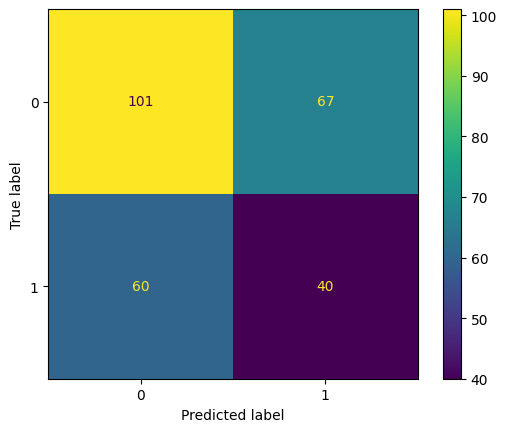

In [ ]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

# GridSearchCV

In [90]:
sm = SMOTE()
x_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)

rna_param_grid = {
    'hidden_layer_sizes': [(10,10,10)],
    'activation': ['relu'],
    'solver': ['sgd'],
    'alpha': [0.0001],
    'learning_rate': ['constant'],
}

grid_search_rna = GridSearchCV(estimator=rna, param_grid=rna_param_grid, cv=10)
grid_search_rna.fit(x_train_oversampled, y_train_oversampled);
print(grid_search_rna.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (693) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (693) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (693) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (693) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 10, 10), 'learning_rate': 'constant', 'solver': 'sgd'}


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (693) reached and the optimization hasn't converged yet.
  warnings.warn(


In [106]:
# criacao de novo df com os dados carregados
g_results_rna =  pd.DataFrame(grid_search_rna.cv_results_)
# media das acuracias
g_results_rna.loc[grid_search_rna.best_index_,'mean_test_score']

0.8150205058099795

In [93]:
m = grid_search_rna.best_estimator_
m.score(X_test,y_test)

0.7985074626865671

# RandomizedSearchCV

In [96]:
r_search_rna = RandomizedSearchCV(estimator = rna, param_distributions = rna_param_grid,
                        n_iter= 10, cv = 10, return_train_score=True, refit = True)

# balanceamento
sm = SMOTE()
x_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)
r_search_rna.fit(x_train_oversampled, y_train_oversampled);
print(r_search_rna.best_params_)
print(r_search_rna.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (693) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (693) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (693) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perc

{'solver': 'sgd', 'learning_rate': 'constant', 'hidden_layer_sizes': (10, 10, 10), 'alpha': 0.0001, 'activation': 'relu'}
0.8032125768967875


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (693) reached and the optimization hasn't converged yet.
  warnings.warn(


In [98]:
model_r_rna = r_search_rna.best_estimator_
model_r_rna.score(X_test, y_test)

0.7798507462686567

# **Decision Tree**

In [ ]:
clf = DecisionTreeClassifier(criterion="entropy")
clf.fit(X_train, y_train)
y_pred_tree = clf.predict(X_test)
accuracy_score(y_test,y_pred_tree)

0.7574626865671642

In [ ]:
# StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified = []

for train_index, test_index in skf.split(X_train, y_train):
    x_train_fold, x_test_fold = previsores[train_index], previsores[test_index]
    y_train_fold, y_test_fold = alvo[train_index], alvo[test_index]
    clf.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(clf.score(x_test_fold, y_test_fold))

print('Lista de ACC:', lst_accu_stratified)
print('\nMaior ACC:',
      max(lst_accu_stratified)*100, '%')
print('\nMenor ACC:',
      min(lst_accu_stratified)*100, '%')
print('\nMédia ACC:',
      sts.mean(lst_accu_stratified)*100, '%')
print('\nDesvio Padrão:', sts.stdev(lst_accu_stratified))

Lista de ACC: [0.8095238095238095, 0.6984126984126984, 0.8412698412698413, 0.8387096774193549, 0.8548387096774194, 0.7903225806451613, 0.7419354838709677, 0.7258064516129032, 0.8225806451612904, 0.7741935483870968]

Maior ACC: 85.48387096774194 %

Menor ACC: 69.84126984126983 %

Média ACC: 78.97593445980543 %

Desvio Padrão: 0.05345462992746447


In [ ]:
y_pred_tree = clf.predict(X_test)
accuracy_score(y_test,y_pred_tree)

0.6194029850746269

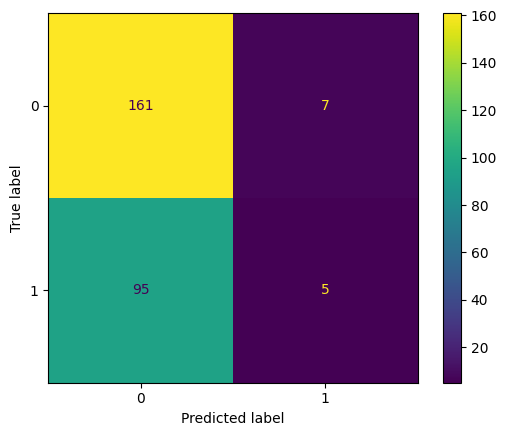

In [ ]:
cm = confusion_matrix(y_test, y_pred_tree)
ConfusionMatrixDisplay(cm).plot()

# **GridSearchCV para Árvore**


In [78]:
# Aplica Balanceamento de Classe
sm = SMOTE()
x_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)

tree_param_grid = {'max_features': ['sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }

grid_search_tree = GridSearchCV(estimator=clf, param_grid=tree_param_grid, cv=10, verbose=True)
# treinamento
grid_search_tree.fit(x_train_oversampled, y_train_oversampled);
print(grid_search_tree.best_params_)

Fitting 10 folds for each of 60 candidates, totalling 600 fits
{'ccp_alpha': 0.001, 'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt'}


In [107]:
# criacao de novo df com os dados carregados
g_results_tree =  pd.DataFrame(grid_search_tree.cv_results_)
# media das acuracias
g_results_tree.loc[grid_search_tree.best_index_,'mean_test_score']

0.7191216678058783

In [80]:
m = grid_search_tree.best_estimator_
m.score(X_test,y_test)

0.667910447761194

# **RandomizedSearchCV para Árvore**


In [ ]:
r_search_tree = RandomizedSearchCV(estimator = clf, param_distributions = tree_param_grid,
                        n_iter= 10, cv = 10, return_train_score=True, refit = True)

# balanceamento
sm = SMOTE()
x_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)
r_search_tree.fit(x_train_oversampled, y_train_oversampled);
print(r_search_tree.best_params_)
print(r_search_tree.best_score_)

{'max_features': 'sqrt', 'max_depth': 6, 'criterion': 'gini', 'ccp_alpha': 0.001}
0.6708646616541354


In [108]:
model_r_tree = r_search_tree.best_estimator_
model_r_tree.score(X_test, y_test)

0.6268656716417911

# **Tensorflow**

In [ ]:
model = tf.keras.Sequential([
tf.keras.layers.Dense(units=1,input_shape=[len(df.columns)-1])])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 242       
                                                                 
Total params: 242
Trainable params: 242
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model = tf.keras.Sequential([tf.keras.layers.Dense(units=100, activation='relu', input_shape=[len(df.columns)-1]), tf.keras.layers.Dense(units=1)])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 100)               24200     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 24,301
Trainable params: 24,301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='mae', metrics=[tf.keras.metrics.BinaryAccuracy()])
losses = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=256, epochs=100, )


Epoch 1/100
3/3 [==============================] - 1s 196ms/step - loss: 0.3963 - binary_accuracy: 0.6116 - val_loss: 0.3740 - val_binary_accuracy: 0.6269
Epoch 2/100
3/3 [==============================] - 0s 44ms/step - loss: 0.3810 - binary_accuracy: 0.6116 - val_loss: 0.3659 - val_binary_accuracy: 0.6269
Epoch 3/100
3/3 [==============================] - 0s 43ms/step - loss: 0.3675 - binary_accuracy: 0.6116 - val_loss: 0.3613 - val_binary_accuracy: 0.6269
Epoch 4/100
3/3 [==============================] - 0s 43ms/step - loss: 0.3581 - binary_accuracy: 0.6100 - val_loss: 0.3571 - val_binary_accuracy: 0.6269
Epoch 5/100
3/3 [==============================] - 0s 43ms/step - loss: 0.3499 - binary_accuracy: 0.6100 - val_loss: 0.3526 - val_binary_accuracy: 0.6269
Epoch 6/100
3/3 [==============================] - 0s 44ms/step - loss: 0.3412 - binary_accuracy: 0.6116 - val_loss: 0.3496 - val_binary_accuracy: 0.6269
Epoch 7/100
3/3 [==============================] - 0s 44ms/step - loss: 0.3

In [ ]:
# passar as 3 primeiras linhas
# dos dados para fazer previsões
model.predict(X_test)

9/9 [==============================] - 0s 3ms/step


array([[-5.68794832e-03],
       [ 3.24973091e-03],
       [ 1.97206467e-01],
       [ 3.34176660e-01],
       [ 7.51783967e-01],
       [ 1.02111906e-01],
       [ 1.33712932e-01],
       [ 7.37841785e-01],
       [ 3.87785509e-02],
       [ 9.65787888e-01],
       [-3.04937363e-03],
       [ 1.00541699e+00],
       [ 1.06996782e-02],
       [ 9.16079044e-01],
       [ 3.36967707e-02],
       [-3.58735770e-03],
       [ 2.61751562e-03],
       [-2.37114727e-03],
       [ 2.06623435e-01],
       [ 3.82445455e-02],
       [ 1.30899930e+00],
       [ 9.35153782e-01],
       [ 1.40804082e-01],
       [ 8.71831417e-01],
       [ 1.88012153e-01],
       [ 1.72984600e-03],
       [ 1.01164639e+00],
       [ 8.32974911e-05],
       [ 1.72984600e-03],
       [ 2.82526344e-01],
       [ 1.85757875e-03],
       [ 9.28345323e-03],
       [ 1.01231432e+00],
       [ 2.62470514e-01],
       [ 1.72984600e-03],
       [ 4.60133642e-01],
       [ 7.35523641e-01],
       [ 1.04485489e-01],
       [ 1.7

<Axes: >

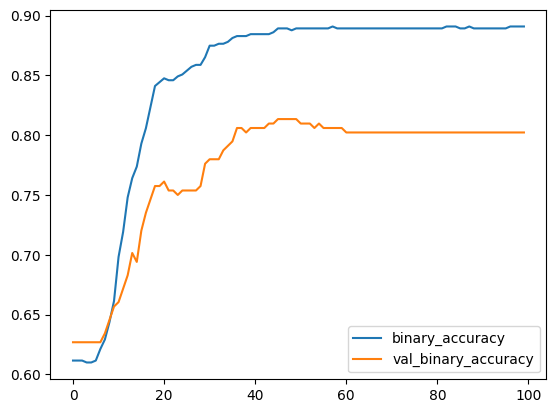

In [ ]:
loss_df = pd.DataFrame(losses.history)

loss_df.loc[:,['binary_accuracy','val_binary_accuracy']].plot()

In [131]:
print("KNN\n")
print(g_results_knn.loc[grid_search_knn.best_index_,'mean_test_score'])
print(grid_search_knn.best_estimator_.score(X_test, y_test))
print(r_search_knn.best_estimator_.score(X_test, y_test))

print("\nNeural Network\n")
print(g_results_rna.loc[grid_search_rna.best_index_,'mean_test_score'])
print(grid_search_rna.best_estimator_.score(X_test, y_test))
print(r_search_rna.best_estimator_.score(X_test, y_test))

print("\nRandom Forest\n")
print("Hyperparameters with cabin:\n")
print(grid_cabin)
print(grid_best)
print(best_est_score)

print("\nHyperparameters without cabin:\n")
print(g_results_rf.loc[g_search.best_index_,'mean_test_score'])
print(g_search.best_estimator_.score(X_test, y_test))
print(r_search.best_estimator_.score(X_test, y_test))

print("\nDecision Tree\n")
print(g_results_tree.loc[grid_search_tree.best_index_,'mean_test_score'])
print(grid_search_tree.best_estimator_.score(X_test, y_test))
print(r_search_tree.best_estimator_.score(X_test, y_test))


KNN

0.8019822282980178
0.7910447761194029
0.7611940298507462

Neural Network

0.8150205058099795
0.7985074626865671
0.7798507462686567

Random Forest

Hyperparameters with cabin:

0.82946001367054
0.7910447761194029
0.8059701492537313

Hyperparameters without cabin:

0.8428571428571429
0.3805970149253731
0.39552238805970147

Decision Tree

0.7191216678058783
0.667910447761194
0.6268656716417911
